In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline


In [17]:
# allow plots to appear directly in the notebook
%matplotlib inline

In [18]:
df=pd.read_csv('dataset_cbse.csv')
# df=pd.read_csv('cocomo81.csv')

In [19]:
df.dtypes

rely       float64
data       float64
cplx       float64
time       float64
stor       float64
virt       float64
turn       float64
acap       float64
aexp       float64
pcap       float64
vexp       float64
lexp       float64
modp       float64
tool       float64
sced       float64
loc        float64
actual     float64
eaf        float64
dd         float64
cod        float64
inte       float64
nloc       float64
nactual      int64
dtype: object

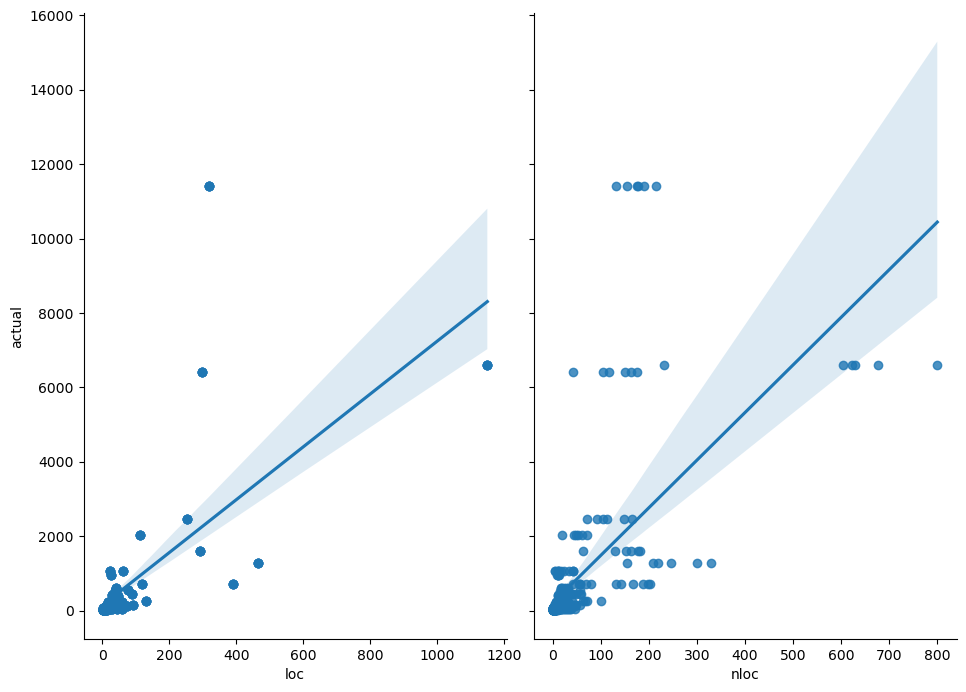

In [20]:
sns.pairplot(df,x_vars=['loc','nloc'],y_vars='actual',size=7,aspect=0.7,kind='reg')

### Modelling

In [21]:
# X = df.drop(columns=['nactual','actual','loc'],axis=1)
# Y = df['nactual']
X = df.drop(columns=['actual'],axis=1)
Y = df['actual']

print(X)
# print(Y)

     rely  data  cplx  time  stor  virt  turn  acap  aexp  pcap  ...  modp  \
0    0.88  1.16  0.70  1.00  1.06  1.15  1.07  1.19  1.13  1.17  ...  1.24   
1    0.88  1.16  0.70  1.00  1.06  1.15  1.07  1.19  1.13  1.17  ...  1.24   
2    0.88  1.16  0.70  1.00  1.06  1.15  1.07  1.19  1.13  1.17  ...  1.24   
3    0.88  1.16  0.70  1.00  1.06  1.15  1.07  1.19  1.13  1.17  ...  1.24   
4    0.88  1.16  0.70  1.00  1.06  1.15  1.07  1.19  1.13  1.17  ...  1.24   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
373  1.00  0.94  1.15  1.00  1.00  1.00  0.87  0.71  0.82  0.86  ...  0.82   
374  1.00  0.94  1.15  1.00  1.00  1.00  0.87  0.71  0.82  0.86  ...  0.82   
375  1.00  0.94  1.15  1.00  1.00  1.00  0.87  0.71  0.82  0.86  ...  0.82   
376  1.00  0.94  1.15  1.00  1.00  1.00  0.87  0.71  0.82  0.86  ...  0.82   
377  1.00  0.94  1.15  1.00  1.00  1.00  0.87  0.71  0.82  0.86  ...  0.82   

     tool  sced    loc  eaf    dd   cod  inte  nloc  nactual  


In [22]:
X_train , X_test , Y_train, Y_test = train_test_split(X,Y,test_size=0.90,random_state=1234)

In [23]:
import seaborn as sns

In [24]:
regr = LinearRegression()

regr.fit(X_train,Y_train)
print(regr.score(X_test,Y_test))

0.9436573885076597


In [25]:
from lazypredict.Supervised import LazyRegressor

In [26]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, Y_train, Y_test)

print(predictions)

100%|██████████| 42/42 [00:02<00:00, 18.50it/s]

                               Adjusted R-Squared          R-Squared  \
Model                                                                  
HuberRegressor                               0.94               0.94   
LinearRegression                             0.94               0.94   
TransformedTargetRegressor                   0.94               0.94   
RANSACRegressor                              0.93               0.94   
Ridge                                        0.93               0.93   
RidgeCV                                      0.93               0.93   
LassoLarsIC                                  0.92               0.93   
BayesianRidge                                0.92               0.93   
SGDRegressor                                 0.91               0.92   
PassiveAggressiveRegressor                   0.91               0.91   
LassoLars                                    0.90               0.91   
Lasso                                        0.90               

In [52]:
# print(models)
# print(models['LinearRegression'])
print(models.iloc[1])

Adjusted R-Squared     0.94
R-Squared              0.94
RMSE                 448.69
Time Taken             0.01
Name: LinearRegression, dtype: float64


what is cbse 
why cbse
effort estimation
different model
old work related to estimation

2 paragraph towards our work 

background
related technology
literature survey
proposed methology (work flow diagram)

In [28]:
from sklearn.ensemble import AdaBoostRegressor,StackingRegressor
from sklearn.ensemble import RandomForestRegressor

In [29]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR

In [53]:
estimators = [
('lr', models.iloc[1]),
('svr', LinearSVR(random_state=42))
]
reg = StackingRegressor(
estimators=estimators,
final_estimator=RandomForestRegressor(n_estimators=10, random_state=42)
)

In [54]:
reg.fit(X_train, Y_train).score(X_test, Y_test)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().